In [49]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pickle


In [5]:
N = 250
M = 1000
K = 5
p_prior = 0.1
code = 0
steps = 5000
net_depth = 2
net_width = 1
num_samples = 99

pps = '{:.3f}'.format(p_prior).replace('.', '')
Ns = str(N)
Ms = str(M)
Ks = str(K)
steps = str(steps)
net_depth = str(net_depth)
net_width = str(net_width)
code = str(code)

laptop = False

In [6]:
if laptop:
    path_ = '/home/rodrigo/Dropbox/DOC/van_error_codes/models/N_%s_M_%s_K_%s_p_prior_%s_steps_%s/' % (Ns, Ms, Ks, pps, steps)
else:
    path_ = '/home/rodsveiga/Dropbox/DOC/van_error_codes/models/N_%s_M_%s_K_%s_p_prior_%s_steps_%s/' % (Ns, Ms, Ks, pps, steps)

In [7]:
message_ = []
decoded_ = []

p_list = [0.495, 0.45, 0.4, 0.375, 0.35, 0.325, 0.3, 0.275, 0.25, 0.225, 0.2, 0.1]

for j, p in enumerate(p_list):


    ps = '{:.3f}'.format(p).replace('.', '')
    PATH = path_ + 'model_N_%s_M_%s_K_%s_p_%s_p_prior_%s_net_depth_%s_net_width_%s_steps_%s/' % (Ns, Ms, Ks, ps, pps, net_depth, net_width, steps)
    message_.append(torch.load(PATH + 'message_N_%s_M_%s_K_%s_p_%s_p_prior_%s.pt' % (Ns, Ms, Ks, ps, pps)))
    decoded_.append(torch.load(PATH + 'av_sample_N_%s_M_%s_K_%s_p_%s_p_prior_%s_num_samples_%s.pt' % (Ns, Ms, Ks, ps, pps, str(num_samples))))

In [8]:
for j in range(len(decoded_)):
    for k in range(len(decoded_)):
        if j != k:
            sum_ = torch.sum(decoded_[j] != decoded_[k]).item() 
            ratio = sum_ / (decoded_[j].shape[0]*decoded_[j].shape[1])
            print('decoded %d, decoded %d, different elements: %d, ratio= %.6f' % (j, k, sum_, ratio))

decoded 0, decoded 1, different elements: 495, ratio= 0.001980
decoded 0, decoded 2, different elements: 514, ratio= 0.002056
decoded 0, decoded 3, different elements: 505, ratio= 0.002020
decoded 0, decoded 4, different elements: 525, ratio= 0.002100
decoded 0, decoded 5, different elements: 478, ratio= 0.001912
decoded 0, decoded 6, different elements: 507, ratio= 0.002028
decoded 0, decoded 7, different elements: 474, ratio= 0.001896
decoded 0, decoded 8, different elements: 503, ratio= 0.002012
decoded 0, decoded 9, different elements: 503, ratio= 0.002012
decoded 0, decoded 10, different elements: 494, ratio= 0.001976
decoded 0, decoded 11, different elements: 510, ratio= 0.002040
decoded 1, decoded 0, different elements: 495, ratio= 0.001980
decoded 1, decoded 2, different elements: 473, ratio= 0.001892
decoded 1, decoded 3, different elements: 514, ratio= 0.002056
decoded 1, decoded 4, different elements: 482, ratio= 0.001928
decoded 1, decoded 5, different elements: 489, ratio=

In [9]:
for j in range(len(message_)):
    for k in range(len(message_)):
        if j != k:
            sum_ = torch.sum(message_[j] != message_[k]).item() 
            ratio = sum_ / (message_[j].shape[0]*message_[j].shape[1])
            print('mesage %d, message %d, different elements: %d, ratio= %.6f' % (j, k, sum_, ratio))

mesage 0, message 1, different elements: 44851, ratio= 0.179404
mesage 0, message 2, different elements: 45083, ratio= 0.180332
mesage 0, message 3, different elements: 45005, ratio= 0.180020
mesage 0, message 4, different elements: 44818, ratio= 0.179272
mesage 0, message 5, different elements: 45124, ratio= 0.180496
mesage 0, message 6, different elements: 44954, ratio= 0.179816
mesage 0, message 7, different elements: 44965, ratio= 0.179860
mesage 0, message 8, different elements: 44771, ratio= 0.179084
mesage 0, message 9, different elements: 44851, ratio= 0.179404
mesage 0, message 10, different elements: 45111, ratio= 0.180444
mesage 0, message 11, different elements: 44870, ratio= 0.179480
mesage 1, message 0, different elements: 44851, ratio= 0.179404
mesage 1, message 2, different elements: 45122, ratio= 0.180488
mesage 1, message 3, different elements: 44860, ratio= 0.179440
mesage 1, message 4, different elements: 44807, ratio= 0.179228
mesage 1, message 5, different element

In [10]:
for j in range(len(message_)):

    sum_ = torch.sum(message_[j] == decoded_[j]).item()
    ratio = sum_ / (message_[j].shape[0]*message_[j].shape[1])
    print('message %d, message %d, equal elements: %d, overlap= %.6f' % (j, j, sum_, ratio))


message 0, message 0, equal elements: 224712, overlap= 0.898848
message 1, message 1, equal elements: 224734, overlap= 0.898936
message 2, message 2, equal elements: 224405, overlap= 0.897620
message 3, message 3, equal elements: 224752, overlap= 0.899008
message 4, message 4, equal elements: 224749, overlap= 0.898996
message 5, message 5, equal elements: 224462, overlap= 0.897848
message 6, message 6, equal elements: 224637, overlap= 0.898548
message 7, message 7, equal elements: 224493, overlap= 0.897972
message 8, message 8, equal elements: 224730, overlap= 0.898920
message 9, message 9, equal elements: 224638, overlap= 0.898552
message 10, message 10, equal elements: 224457, overlap= 0.897828
message 11, message 11, equal elements: 224608, overlap= 0.898432


In [11]:
message_[0].shape[0]*message_[0].shape[1]

250000

In [12]:
p_list = np.array([0.495, 0.45, 0.4, 0.375, 0.35, 0.325, 0.3, 0.275, 0.25, 0.225, 0.2, 0.1])
beta_list = 0.5*np.log( (1. - p_list) / p_list)

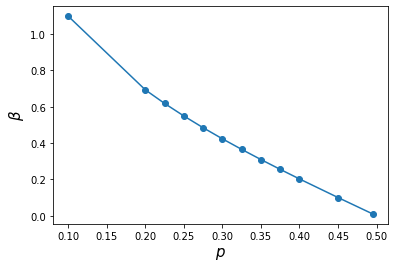

In [13]:
plt.plot(p_list, beta_list, 'o-')
plt.ylabel('$\\beta$', fontsize=15)
plt.xlabel('$p$', fontsize=15)
plt.show()

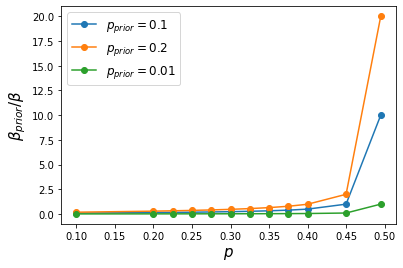

In [14]:
plt.plot(p_list, 0.1/ beta_list, 'o-', label= '$p_{prior} = 0.1$')
plt.plot(p_list, 0.2/ beta_list, 'o-', label= '$p_{prior} = 0.2$')
plt.plot(p_list, 0.01/ beta_list, 'o-', label= '$p_{prior} = 0.01$')
plt.ylabel('$\\beta_{prior} / \\beta $', fontsize=15)
plt.xlabel('$p$', fontsize=15)
plt.legend(fontsize=12)
plt.show()

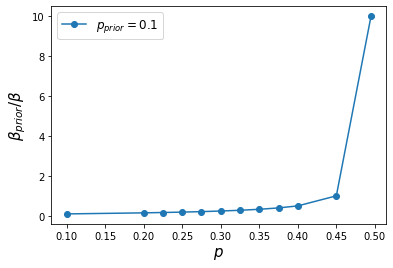

In [15]:
plt.plot(p_list, 0.1/ beta_list, 'o-', label= '$p_{prior} = 0.1$')
#plt.plot(p_list, 0.2/ beta_list, 'o-', label= '$p_{prior} = 0.2$')
#plt.plot(p_list, 0.01/ beta_list, 'o-', label= '$p_{prior} = 0.01$')
plt.ylabel('$\\beta_{prior} / \\beta $', fontsize=15)
plt.xlabel('$p$', fontsize=15)
plt.legend(fontsize=12)
plt.show()

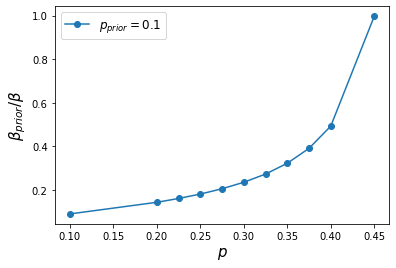

In [16]:
plt.plot(p_list[1:], 0.1/ beta_list[1:], 'o-', label= '$p_{prior} = 0.1$')
#plt.plot(p_list, 0.2/ beta_list, 'o-', label= '$p_{prior} = 0.2$')
#plt.plot(p_list, 0.01/ beta_list, 'o-', label= '$p_{prior} = 0.01$')
plt.ylabel('$\\beta_{prior} / \\beta $', fontsize=15)
plt.xlabel('$p$', fontsize=15)
plt.legend(fontsize=12)
plt.show()

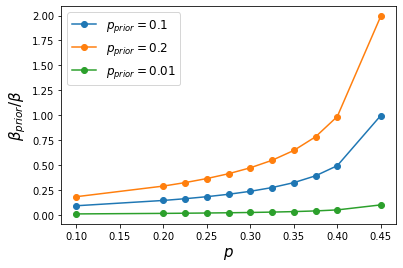

In [17]:
plt.plot(p_list[1:], 0.1/ beta_list[1:], 'o-', label= '$p_{prior} = 0.1$')
plt.plot(p_list[1:], 0.2/ beta_list[1:], 'o-', label= '$p_{prior} = 0.2$')
plt.plot(p_list[1:], 0.01/ beta_list[1:], 'o-', label= '$p_{prior} = 0.01$')
plt.ylabel('$\\beta_{prior} / \\beta $', fontsize=15)
plt.xlabel('$p$', fontsize=15)
plt.legend(fontsize=12)
plt.show()

In [18]:
message_[0].shape

torch.Size([1000, 250])

In [19]:
len(message_)

12

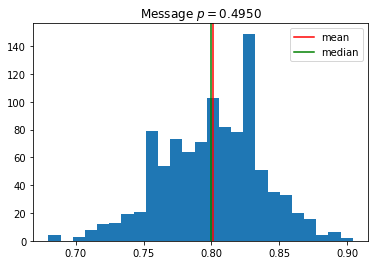

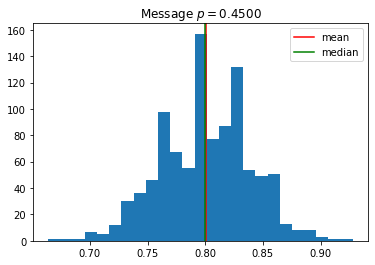

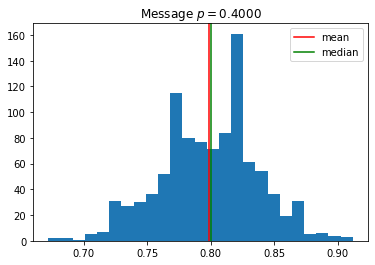

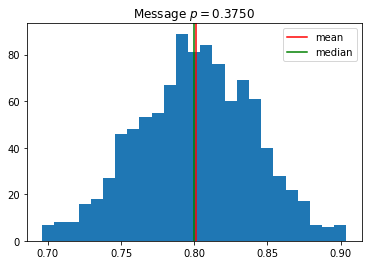

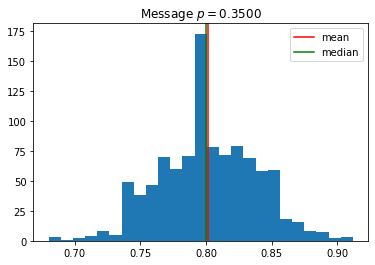

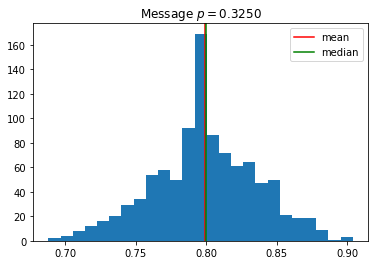

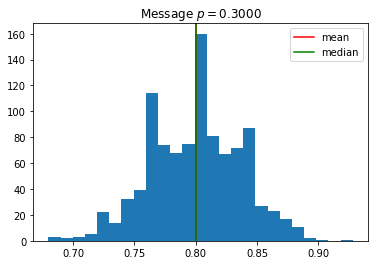

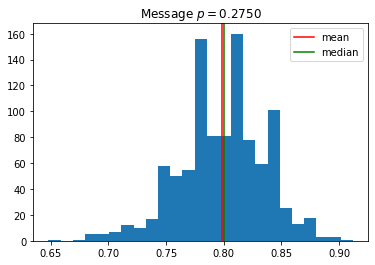

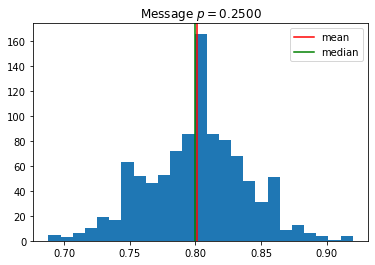

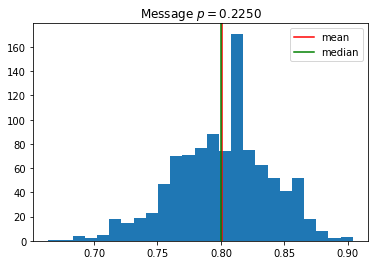

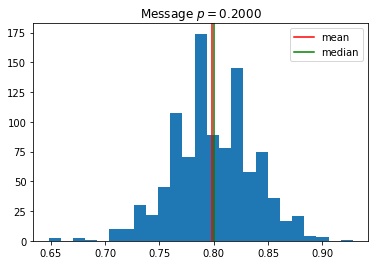

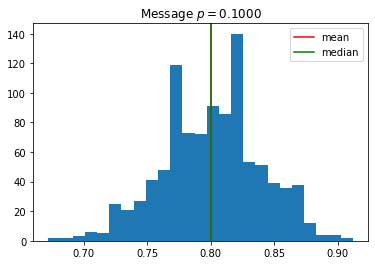

In [20]:
p_list = [0.495, 0.45, 0.4, 0.375, 0.35, 0.325, 0.3, 0.275, 0.25, 0.225, 0.2, 0.1]

for j, p in enumerate(p_list):
    mag_set = message_[j].sum(dim=1) / message_[j].shape[1]
    plt.hist(mag_set.numpy(), bins= 25)
    plt.axvline(mag_set.numpy().mean(),  label='mean', color= 'red')
    plt.axvline(np.median(mag_set.numpy()),  label='median', color= 'green')    
    plt.title('Message $p= %.4f$' % p)
    plt.legend()
    plt.show()

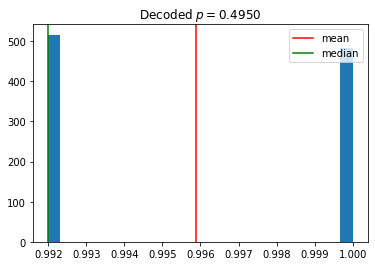

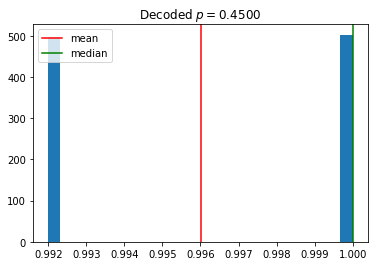

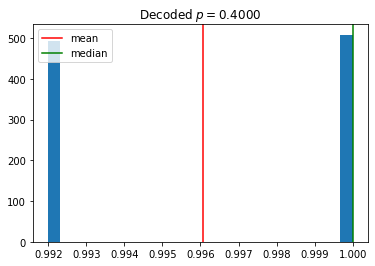

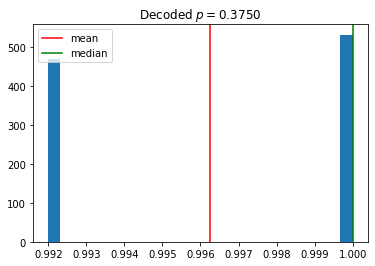

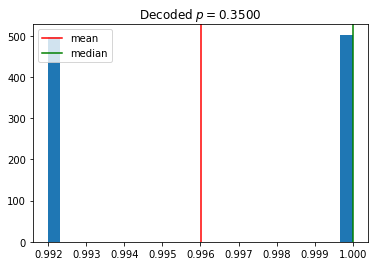

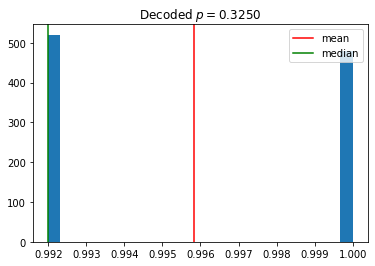

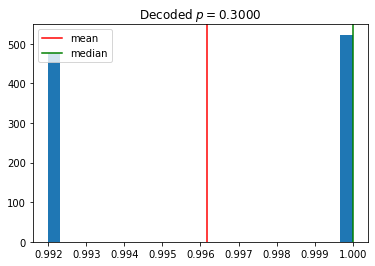

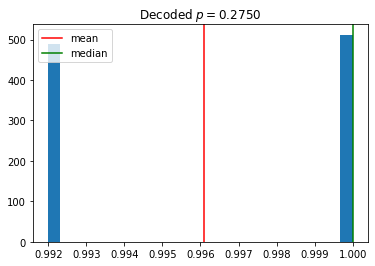

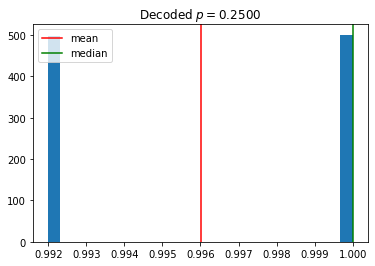

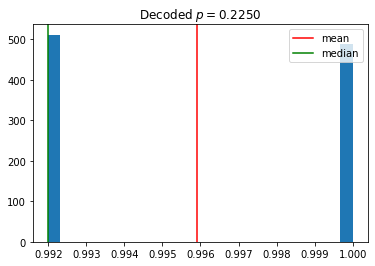

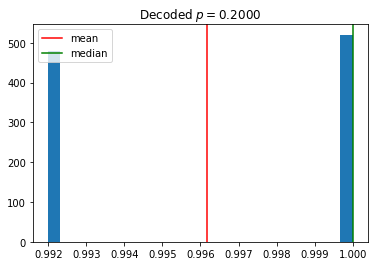

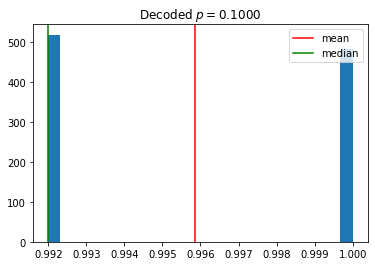

In [22]:
for j, p in enumerate(p_list):
    mag_set = decoded_[j].sum(dim=1) / decoded_[j].shape[1]
    plt.hist(mag_set.numpy(), bins= 25)
    plt.axvline(mag_set.numpy().mean(),  label='mean', color= 'red')
    plt.axvline(np.median(mag_set.numpy()),  label='median', color= 'green')    
    plt.title('Decoded $p= %.4f$' % p)
    plt.legend()
    plt.show()

In [30]:
J0_ = []
J_ = []

p_list = [0.495, 0.45, 0.4, 0.375, 0.35, 0.325, 0.3, 0.275, 0.25, 0.225, 0.2, 0.1]

for j, p in enumerate(p_list):


    ps = '{:.3f}'.format(p).replace('.', '')
    PATH = path_ + 'model_N_%s_M_%s_K_%s_p_%s_p_prior_%s_net_depth_%s_net_width_%s_steps_%s/' % (Ns, Ms, Ks, ps, pps, net_depth, net_width, steps)
    J0_.append(torch.load(PATH + 'encoded_J_N_%s_M_%s_K_%s_p_%s_p_prior_%s_code_0.pt' % (Ns, Ms, Ks, ps, pps)))
    J_.append(torch.load(PATH + 'corrupted_J_N_%s_M_%s_K_%s_p_%s_p_prior_%s_code_0.pt' % (Ns, Ms, Ks, ps, pps)))

In [31]:
J0_[0]

tensor([[-1., -1., -1.,  ...,  1., -1., -1.],
        [-1.,  1.,  1.,  ...,  1.,  1.,  1.],
        [ 1.,  1., -1.,  ..., -1., -1., -1.],
        ...,
        [-1.,  1., -1.,  ...,  1.,  1., -1.],
        [-1., -1., -1.,  ..., -1.,  1.,  1.],
        [ 1., -1.,  1.,  ...,  1.,  1.,  1.]])

In [34]:
torch.sum(J0_[0] != J_[0]).item()

495130

In [39]:
p_list

[0.495, 0.45, 0.4, 0.375, 0.35, 0.325, 0.3, 0.275, 0.25, 0.225, 0.2, 0.1]

In [43]:
for j in range(len(J0_)):

    sum_ = torch.sum(J0_[j] == J_[j]).item()
    ratio = sum_ / (J0_[j].shape[0] * J0_[j].shape[1])
    print('J0: %d, J: %d, p= %.3f, equal elements: %d, overlap_J0_J= %.6f' % (j, j, p_list[j], sum_, ratio))

J0: 0, J: 0, p= 0.495, equal elements: 504870, overlap_J0_J= 0.504870
J0: 1, J: 1, p= 0.450, equal elements: 549836, overlap_J0_J= 0.549836
J0: 2, J: 2, p= 0.400, equal elements: 599914, overlap_J0_J= 0.599914
J0: 3, J: 3, p= 0.375, equal elements: 624904, overlap_J0_J= 0.624904
J0: 4, J: 4, p= 0.350, equal elements: 649824, overlap_J0_J= 0.649824
J0: 5, J: 5, p= 0.325, equal elements: 674658, overlap_J0_J= 0.674658
J0: 6, J: 6, p= 0.300, equal elements: 700079, overlap_J0_J= 0.700079
J0: 7, J: 7, p= 0.275, equal elements: 724097, overlap_J0_J= 0.724097
J0: 8, J: 8, p= 0.250, equal elements: 750465, overlap_J0_J= 0.750465
J0: 9, J: 9, p= 0.225, equal elements: 774655, overlap_J0_J= 0.774655
J0: 10, J: 10, p= 0.200, equal elements: 799351, overlap_J0_J= 0.799351
J0: 11, J: 11, p= 0.100, equal elements: 899911, overlap_J0_J= 0.899911


In [ ]:
                
PATH = path + 'model_N_%s_M_%s_K_%s_p_%s_p_prior_%s_code_%s_step_%s.pt' % (Ns, Ms, Ks,ps, pps, ks, str(steps))
        
                
net = MADE(**vars(args))
net.load_state_dict(torch.load(PATH))


        # Sampling output does not keep tensor history, so memory usage does not blow
        for param in net.parameters():
            param.requires_grad = False

In [108]:
model_params_ = []

p_list = [0.495, 0.45, 0.4, 0.375, 0.35, 0.325, 0.3, 0.275, 0.25, 0.225, 0.2, 0.1]

for j, p in enumerate(p_list):


    ps = '{:.3f}'.format(p).replace('.', '')
    PATH = path_ + 'model_N_%s_M_%s_K_%s_p_%s_p_prior_%s_net_depth_%s_net_width_%s_steps_%s/' % (Ns, Ms, Ks, ps, pps, net_depth, net_width, steps)
    filename = PATH + 'model_params_N_%s_M_%s_K_%s_p_%s_p_prior_%s_code_0_step_%s.pkl' % (Ns, Ms, Ks, ps, pps, steps)

    #net = MADE(**vars(args))
    #net.load_state_dict(torch.load(path))

    # Sampling output does not keep tensor history, so memory usage does not blow
    #for param in net.parameters():
    #    param.requires_grad = False

    #model_params_.append(net.parameters())

    with open(filename, 'rb') as f:
        loaded_params = pickle.load(f)
        model_params_.append(loaded_params)

Observe we have here an upper triangular matrix. To construct histograms to make comparision, we should elimit this whole bunch of zeros.

In [109]:
model_params_[0]

[Parameter containing:
 tensor([[ 0.0000, -0.0000, -0.0000,  ...,  0.0000, -0.0000, -0.0000],
         [-1.4286, -0.0000, -0.0000,  ..., -0.0000,  0.0000, -0.0000],
         [ 0.9933,  0.0422, -0.0000,  ..., -0.0000,  0.0000, -0.0000],
         ...,
         [-0.0677, -0.0312, -0.0790,  ..., -0.0000,  0.0000,  0.0000],
         [ 0.0521,  0.0946,  0.0801,  ...,  0.0311, -0.0000,  0.0000],
         [ 0.1198,  0.0098, -0.0567,  ...,  0.0182, -0.0365, -0.0000]]),
 Parameter containing:
 tensor([ 5.0000e-01, -9.8981e-01, -1.0031e+00, -5.2951e-01, -4.7435e-01,
         -2.0751e-01, -3.1167e-01, -2.3484e-01, -8.8201e-02,  3.4119e-02,
          4.8093e-02, -1.0574e-01, -9.0488e-02,  1.0549e-01, -9.8576e-02,
         -5.6993e-03, -1.0785e-01, -3.0129e-02, -3.1566e-02,  1.7322e-01,
         -4.9744e-02, -1.4582e-02,  1.8262e-01,  9.1745e-02,  8.4371e-02,
          2.3845e-01,  2.4605e-01,  2.0064e-01,  4.7865e-02,  1.5193e-01,
          2.3037e-01,  5.9237e-02, -3.8147e-03,  2.0956e-01,  5.5175

In [110]:
for j in range(len(model_params_)):

    tri_index = torch.triu_indices(model_params_[j][0].shape[0], model_params_[j][0].shape[1])
    model_params_[j][0] = model_params_[j][0].t()[tri_index[0], tri_index[1]]

    tri_index = torch.triu_indices(model_params_[j][2].shape[0], model_params_[j][2].shape[1])
    model_params_[j][2] = model_params_[j][2].t()[tri_index[0], tri_index[1]]

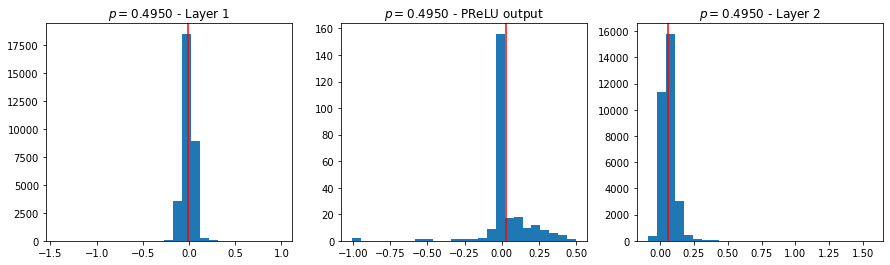

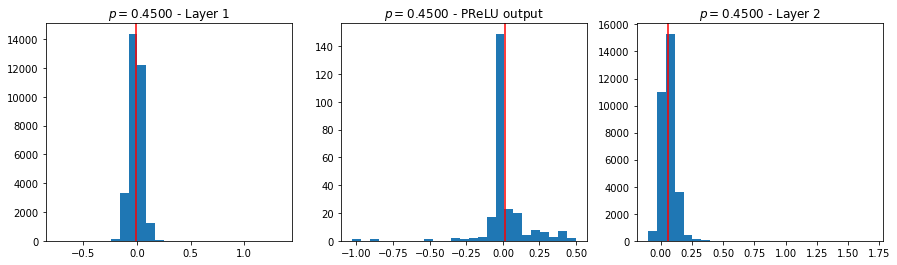

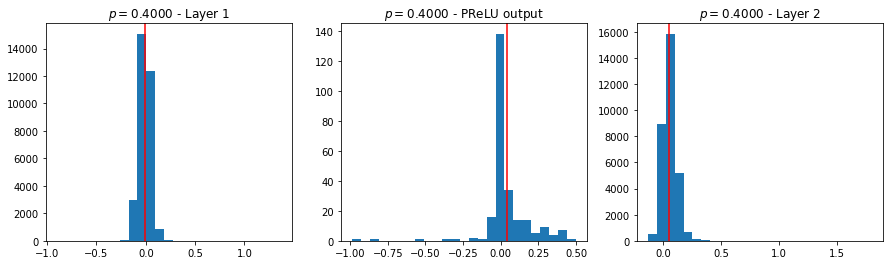

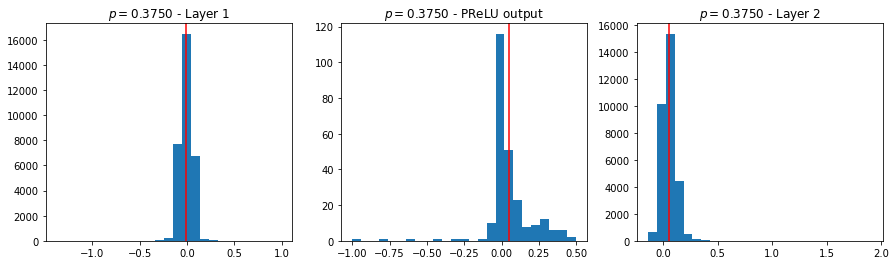

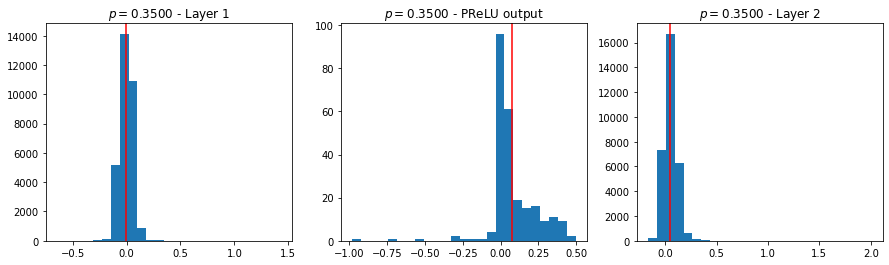

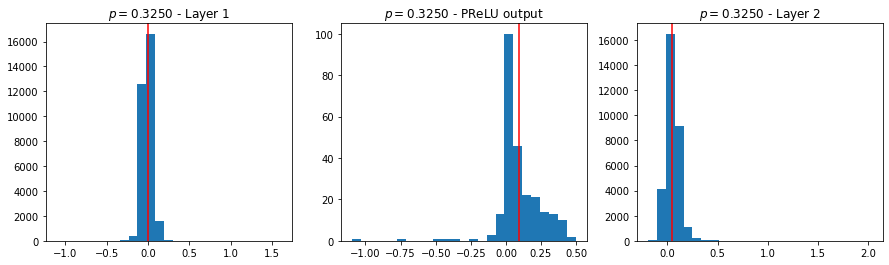

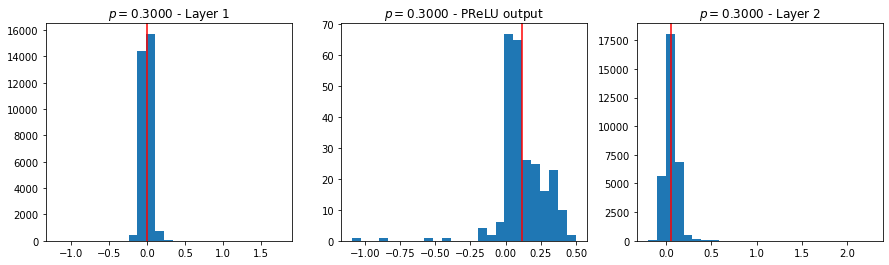

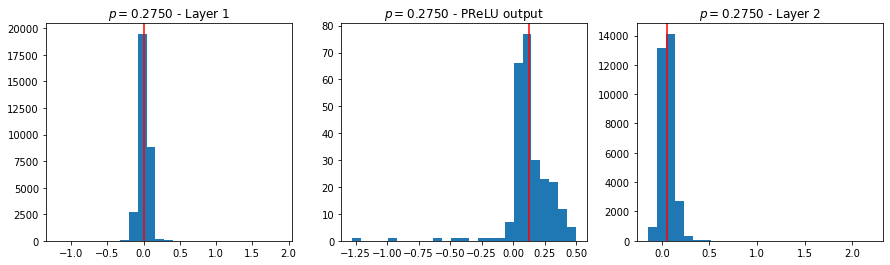

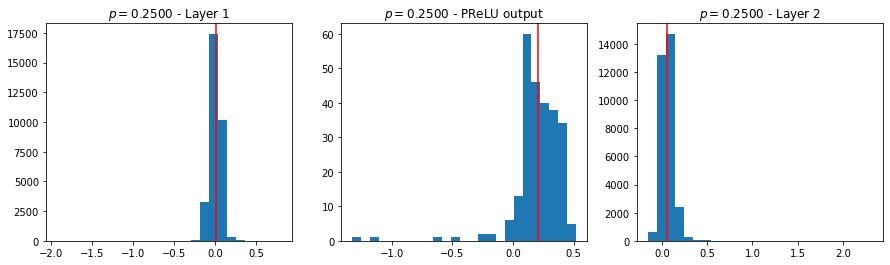

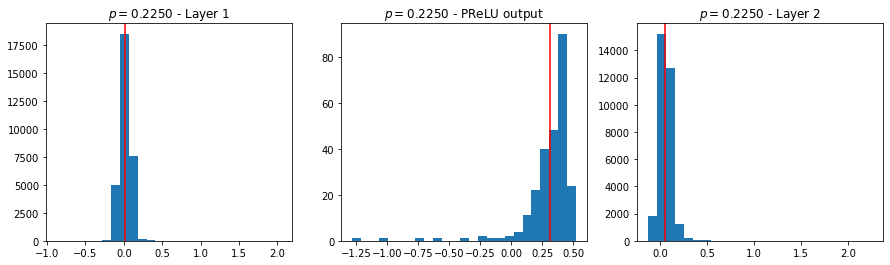

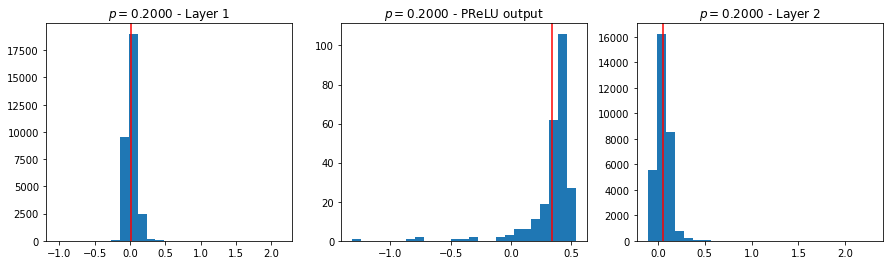

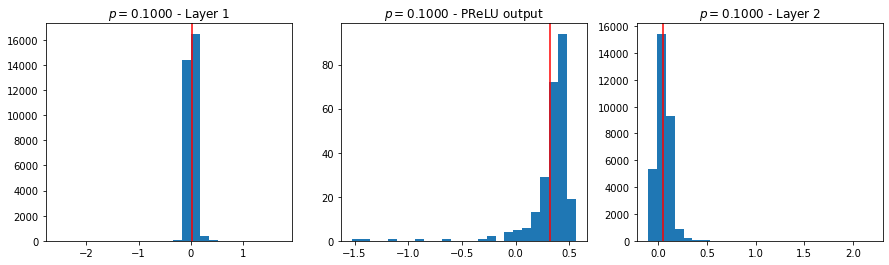

In [114]:
for j, p in enumerate(p_list):
    #for k in range(3):

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))
    #fig.suptitle('Horizontally stacked subplots')
    ax1.hist(model_params_[j][0].reshape(-1).numpy(), bins= 25)
    ax1.axvline(model_params_[j][0].reshape(-1).numpy().mean(),  label='mean', color= 'red')

    ax2.hist(model_params_[j][1].reshape(-1).numpy(), bins= 25)
    ax2.axvline(model_params_[j][1].reshape(-1).numpy().mean(),  label='mean', color= 'red')

    ax3.hist(model_params_[j][2].reshape(-1).numpy(), bins= 25)
    ax3.axvline(model_params_[j][2].reshape(-1).numpy().mean(),  label='mean', color= 'red')

    ax1.set_title('$p= %.4f$ - Layer %s' % (p, 1))
    ax2.set_title('$p= %.4f$ - PReLU output' % p)
    ax3.set_title('$p= %.4f$ - Layer %s' % (p, 2))
          
        #plt.hist(model_params_[j][k].reshape(-1).numpy())
        #mag_set = decoded_[j].sum(dim=1) / decoded_[j].shape[1]
        #plt.hist(mag_set.numpy(), bins= 25)
        #plt.axvline(model_params_[j][k].reshape(-1).numpy().mean(),  label='mean', color= 'red')
        #plt.axvline(np.median(mag_set.numpy()),  label='median', color= 'green')    
        #fig.suptitle('$p= %.4f$ - Layer %s' % (p, k))
    #plt.legend()
    plt.show()